In [1]:
import torch
import loss_landscapes
import loss_landscapes.metrics
import matplotlib.pyplot as plt
import numpy as np
from torch import nn
from copy import deepcopy

In [2]:
x = torch.tensor([
    [1, 0, 1],
    [0, 1, 0],
    [1, 1, 0],
], dtype=torch.float32)

# y = torch.tensor([1, 2, 3], dtype=torch.float32)
y = torch.eye(len(x))

In [27]:
model = nn.Sequential(
    nn.Linear(3, 64),
    nn.ReLU(),
    nn.Linear(64, 3),
    nn.Sigmoid()
)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-2)
loss_fn = torch.nn.BCELoss()

model_initial = deepcopy(model)

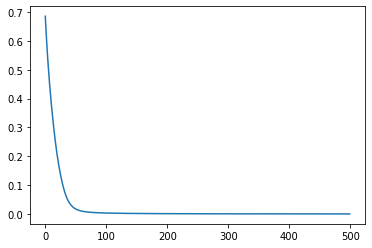

In [28]:
losses = []

for _ in range(500):
    y_pred = model(x)

    loss = loss_fn(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())

model_final = deepcopy(model)

plt.plot(losses);

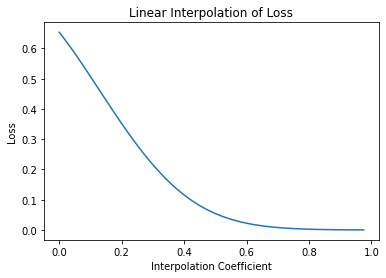

In [29]:
# contour plot resolution
STEPS = 40

metric = loss_landscapes.metrics.Loss(loss_fn, x, y)
loss_data = loss_landscapes.linear_interpolation(model_initial, model_final, metric, STEPS, deepcopy_model=True)

plt.plot([1/STEPS * i for i in range(STEPS)], loss_data)
plt.title('Linear Interpolation of Loss')
plt.xlabel('Interpolation Coefficient')
plt.ylabel('Loss')
axes = plt.gca()
# axes.set_ylim([2.300,2.325])
plt.show()

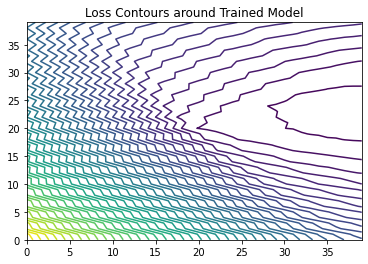

In [32]:
loss_data_fin = loss_landscapes.random_plane(model_final, metric, 40, STEPS, normalization='filter', deepcopy_model=True)

plt.contour(loss_data_fin, levels=50)
plt.title('Loss Contours around Trained Model')
plt.show()

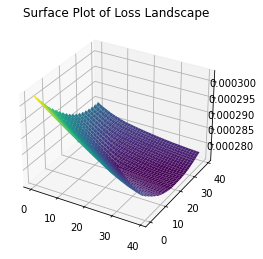

In [34]:
fig = plt.figure()
ax = plt.axes(projection='3d')
X = np.array([[j for j in range(STEPS)] for i in range(STEPS)])
Y = np.array([[i for _ in range(STEPS)] for i in range(STEPS)])
ax.plot_surface(X, Y, loss_data_fin, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('Surface Plot of Loss Landscape')
fig.show()